# Курсовой проект для курса "Python для Data Science"

## Info

Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Основная метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Вспомогательная метрика:
MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)

Сдача проекта:
1. Прислать в раздел Задания Урока 12 ("Вебинар. Консультация по итоговому проекту")
ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook 
с расширением ipynb).
2. Приложить файл с названием по образцу SShirkin_predictions.csv
с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).

Сроки сдачи:
Сдать проект за 72 часа до начала Урока 13 ("Вебинар. Результаты итоговых проектов и закрытие курса").

Примечание:
Все файлы csv должны содержать названия полей (header - то есть "шапку"),
разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

## Load Dataset


### Load packages

In [1]:
import pandas as pd

### Function

In [2]:
def optimizing_df(df):
    for col in df.columns:
        if df[col].dtypes.kind == 'i' or df[col].dtypes.kind == 'u':
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            else:
                df[col] = pd.to_numeric(df[col], downcast='integer')

        elif df[col].dtypes.kind == 'f' or df[col].dtypes.kind == 'c':
            df[col] = pd.to_numeric(df[col], downcast='float')

        elif df[col].dtypes.kind == 'O':
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')

    return df

### Load data

In [3]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')
print("Data is loaded!")

Data is loaded!


In [4]:
print(f"Train: {train.shape[0]} sales and {train.shape[1]} features")
print(f'Test: {test.shape[0]} sales, and {test.shape[1]} features')

Train: 10000 sales and 20 features
Test: 5000 sales, and 19 features


In [5]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [7]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 3.2 MB


In [8]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 1.6 MB


### Memory use optimization

In [9]:
train['Rooms'] = train['Rooms'].astype('int64')
test['Rooms'] = test['Rooms'].astype('int64')

In [10]:
train['HouseFloor'] = train['HouseFloor'].astype('int64')
test['HouseFloor'] = test['HouseFloor'].astype('int64')

In [11]:
train = optimizing_df(train)
test = optimizing_df(test)

In [12]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null uint16
DistrictId       10000 non-null uint8
Rooms            10000 non-null uint8
Square           10000 non-null float32
LifeSquare       7887 non-null float32
KitchenSquare    10000 non-null float32
Floor            10000 non-null uint8
HouseFloor       10000 non-null uint8
HouseYear        10000 non-null uint32
Ecology_1        10000 non-null float32
Ecology_2        10000 non-null category
Ecology_3        10000 non-null category
Social_1         10000 non-null uint8
Social_2         10000 non-null uint16
Social_3         10000 non-null uint8
Healthcare_1     5202 non-null float32
Helthcare_2      10000 non-null uint8
Shops_1          10000 non-null uint8
Shops_2          10000 non-null category
Price            10000 non-null float32
dtypes: category(3), float32(6), uint16(2), uint32(1), uint8(8)
memory usage: 420.6 KB


In [13]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null uint16
DistrictId       5000 non-null uint8
Rooms            5000 non-null uint8
Square           5000 non-null float32
LifeSquare       3959 non-null float32
KitchenSquare    5000 non-null float32
Floor            5000 non-null uint8
HouseFloor       5000 non-null uint8
HouseYear        5000 non-null uint16
Ecology_1        5000 non-null float32
Ecology_2        5000 non-null category
Ecology_3        5000 non-null category
Social_1         5000 non-null uint8
Social_2         5000 non-null uint16
Social_3         5000 non-null uint8
Healthcare_1     2623 non-null float32
Helthcare_2      5000 non-null uint8
Shops_1          5000 non-null uint8
Shops_2          5000 non-null category
dtypes: category(3), float32(5), uint16(3), uint8(8)
memory usage: 181.4 KB


### Data checking

In [14]:
all_data = pd.concat((train, test), sort=False).reset_index(drop=True)
all_data.drop(['Price'], axis=1, inplace=True)
print(f'all_data size is : {all_data.shape}')

all_data size is : (15000, 19)


In [15]:
all_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,15000.0,8393.136933,4850.111673,0.000000,4188.750000,8378.500000,12594.250000,1.679800e+04
DistrictId,15000.0,50.693600,43.786257,0.000000,20.000000,37.000000,75.000000,2.120000e+02
Rooms,15000.0,1.897000,0.839229,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,15000.0,56.360352,20.423912,1.136859,41.814370,52.645758,66.036606,6.410652e+02
LifeSquare,11846.0,36.851791,71.120186,0.333490,22.896130,32.822811,45.144627,7.480592e+03
KitchenSquare,15000.0,6.174467,24.016979,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,15000.0,8.561800,5.323113,1.000000,4.000000,7.000000,12.000000,7.800000e+01
HouseFloor,15000.0,12.606600,6.780165,0.000000,9.000000,12.000000,17.000000,1.170000e+02
HouseYear,15000.0,3321.575067,163707.780381,1908.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,15000.0,0.119196,0.119371,0.000000,0.017647,0.075424,0.195781,5.218670e-01


#### Rooms

#### Square

#### HouseYear

In [16]:
all_data.loc[all_data['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1497,10814,109,1,37.265072,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B
4189,11607,147,2,44.791836,28.360394,5.0,4,9,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B


In [17]:
train.loc[train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1,37.265072,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.531250
4189,11607,147,2,44.791836,28.360394,5.0,4,9,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.609375


In [18]:
test.loc[test['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [19]:
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011)/2)

In [20]:
train.loc[train['HouseYear'] == 4968, 'HouseYear'] = 1968

## Data Processing

### Load packages

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
%matplotlib inline

### Target Variable¶

#### Normal distribution of the target variable

mu = 214138.86 and sigma = 92867.65


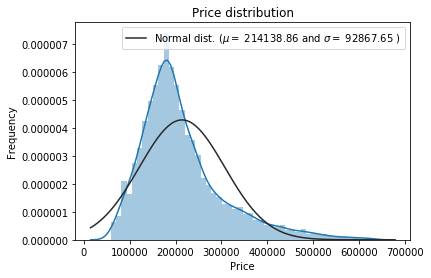

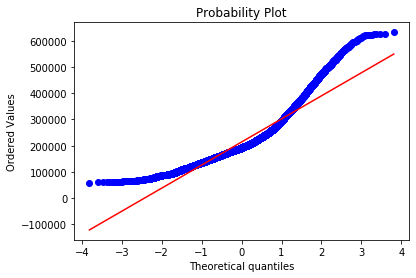

In [22]:
sns.distplot(train['Price'], fit=norm)

mu, sigma = norm.fit(train['Price'])

print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

plt.legend(
    [f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'], loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)
plt.show()

#### Log distribution of the target variable

mu = 214138.86 and sigma = 92867.65


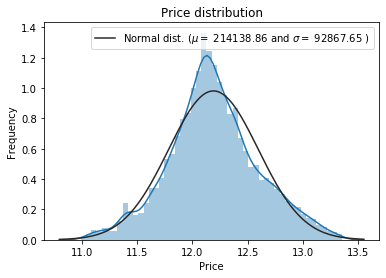

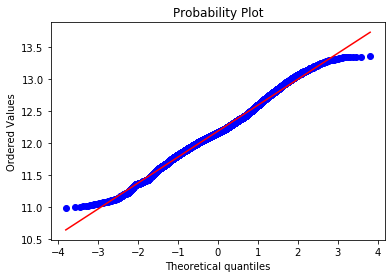

In [23]:
price_log = np.log1p(train['Price'])

sns.distplot(price_log, fit=norm)

mu, sigma = norm.fit(train['Price'])

print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

plt.legend(
    [f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'], loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(price_log, plot=plt)
plt.show()

### Distribution of variable House Year

Text(0.5, 1.0, 'Distribution of variable House Year')

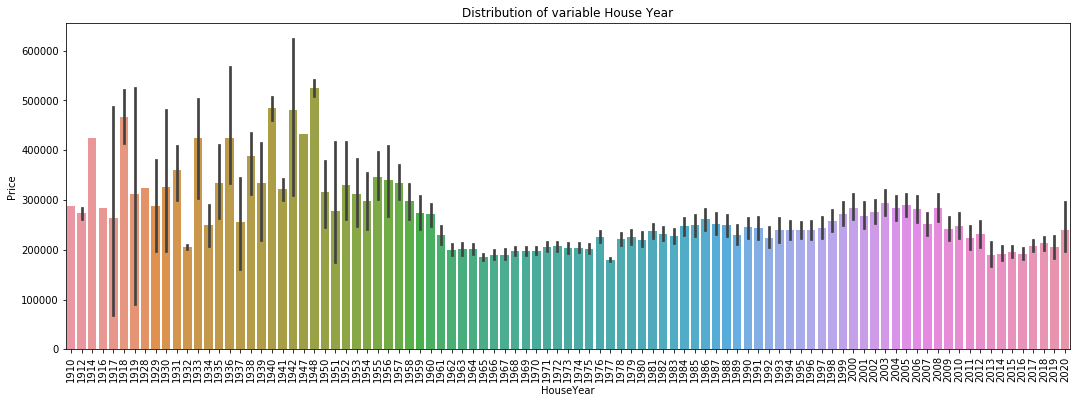

In [24]:
plt.figure(figsize=(18, 6))
sns.barplot(train['HouseYear'], train['Price'])
plt.xticks(rotation=90)
plt.title('Distribution of variable House Year')

### Distribution of variable District Id 

Text(0.5, 1.0, 'Distribution of variable District Id')

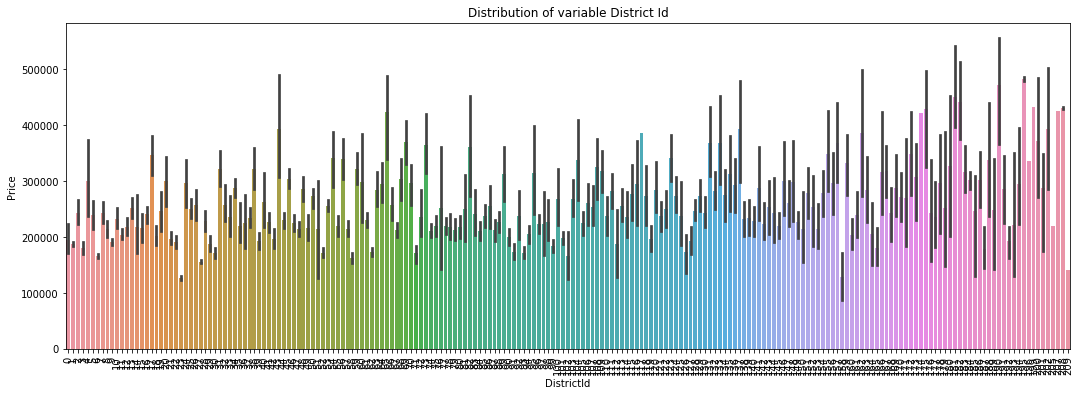

In [25]:
plt.figure(figsize=(18, 6))
sns.barplot(train['DistrictId'], train['Price'])
plt.xticks(rotation=90)
plt.title('Distribution of variable District Id')

### Features engineering

#### Missing Data

In [26]:
all_data = pd.concat((train, test), sort=False).reset_index(drop=True)
all_data.drop(['Price'], axis=1, inplace=True)
print(f'all_data size is : {all_data.shape}')

all_data size is : (15000, 19)


In [27]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(
    all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data

,Missing Ratio
Healthcare_1,47.833333
LifeSquare,21.026667


#### Data Correlation

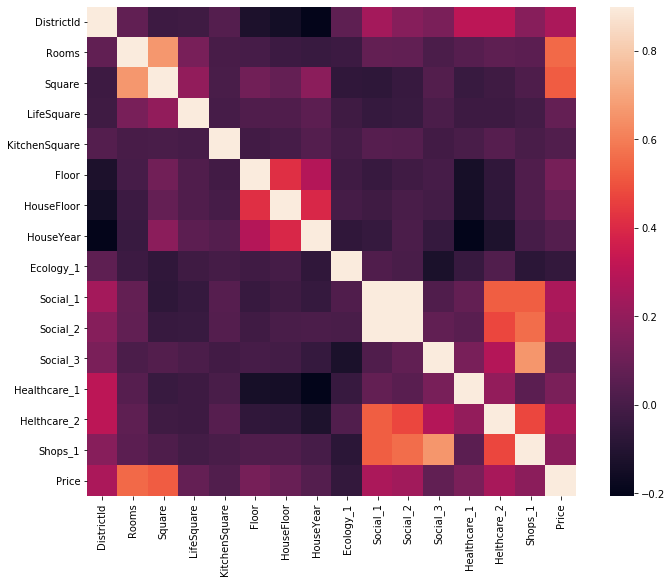

In [28]:
corrmat = train.loc[:, train.columns != 'Id'].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True)

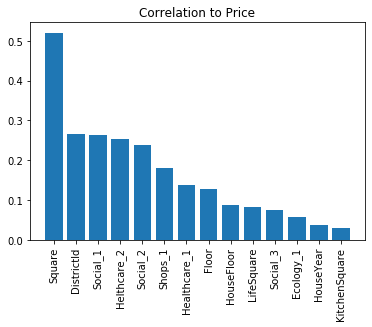

In [29]:
corrmat = train.loc[:, train.columns != 'Id'].corrwith(
    train['Price']).abs().sort_values(ascending=False)[2:]
plt.bar(corrmat.index, corrmat.values)
plt.title('Correlation to Price')
plt.xticks(rotation='vertical')
plt.show()

#### Dummy variables

In [30]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [31]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2,47.981560,29.442751,6.0,7,9,1969,0.089040,...,NaN,0,11,184966.937500,0,1,0,1,0,1
1,15053,41,3,65.683640,40.049541,8.0,7,9,1978,0.000070,...,240.0,1,16,300009.437500,0,1,0,1,0,1
2,4765,53,2,44.947952,29.197611,0.0,8,12,1968,0.049637,...,229.0,1,3,220925.906250,0,1,0,1,0,1
3,5809,58,2,53.352982,52.731510,9.0,8,17,1977,0.437885,...,1084.0,0,5,175616.234375,0,1,0,1,0,1
4,10783,99,1,39.649193,23.776169,7.0,11,12,1976,0.012339,...,2078.0,2,4,150226.531250,0,1,0,1,0,1


In [32]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2,49.882645,33.432781,6.0,6,14,1972,0.310199,...,1,NaN,0,0,0,1,0,1,0,1
1,15856,74,2,69.263184,NaN,1.0,6,1,1977,0.075779,...,3,NaN,0,2,0,1,0,1,0,1
2,5480,190,1,13.597818,15.948246,12.0,2,5,1909,0.000000,...,87,4702.0,5,5,0,1,0,1,0,1
3,15664,47,2,73.046608,51.940842,9.0,22,22,2007,0.101872,...,3,NaN,3,3,0,1,0,1,0,1
4,14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,...,1,NaN,0,0,0,1,0,1,1,0


## Modelling

### Load packages

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

###  Data processing

In [78]:
print(train.columns)

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B'],
      dtype='object')


In [79]:
features = ['DistrictId',
            'Rooms',
            'Square',
            'KitchenSquare',
            'Floor',
            'HouseFloor',
            'HouseYear',
            'Ecology_1',
            'Social_1',
            'Social_2',
            'Social_3',
            'Helthcare_2',
            'Shops_1',
            'Ecology_2_A',
            'Ecology_2_B',
            'Ecology_3_A',
            'Ecology_3_B',
            'Shops_2_A',
            'Shops_2_B']

target = 'Price'

In [35]:
models_dict = {}

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    train[features], train[target], test_size=0.3, random_state=42)

### Function

In [37]:
def model_test(model, name='', test=X_test, valid=y_test):
    model_pred = model.predict(test)
    r2 = r2_score(valid, model_pred)
    mse = mean_squared_error(valid, model_pred)
    plt.scatter(valid, (model_pred - valid))
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.title(name)
    plt.legend([f'R2= {r2:.4f} and mse= {mse:.0f}'])
    plt.plot([y_test.min(), y_test.max()], [0, 0], c='red')
    plt.show()


def model_top_deviation(model, test=X_test, valid=y_test):
    model_pred = model.predict(test)
    model_test = test.copy()
    model_test['Price'] = model_pred.astype('int32')
    model_test['Price_test'] = valid.astype('int32')
    model_test['SD'] = abs(model_test['Price']
                           - model_test['Price_test']).astype('int32')
    return model_test.nlargest(10, 'SD')

### Linear Regression

In [38]:
line_regression_model = LinearRegression()
line_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
models_dict['Linear Regression'] = line_regression_model

#### Test Linear Regression

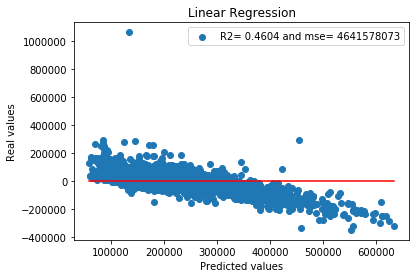

In [40]:
model_test(line_regression_model, 'Linear Regression')

In [41]:
model_top_deviation(line_regression_model)

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price,Price_test,SD
6977,30,2,641.065186,10.0,20,19,2019,0.000078,22,6398,...,23,0,1,0,1,0,1,1195339,133529,1061810
8546,43,2,55.637753,9.0,2,5,1958,0.000078,22,6398,...,23,0,1,0,1,0,1,204227,552515,348288
8283,34,1,1.988943,1.0,21,4,1977,0.069753,53,13670,...,11,0,1,0,1,0,1,124144,458378,334234
6794,73,2,73.210350,1.0,16,17,2019,0.042032,37,6856,...,5,0,1,0,1,0,1,311436,633233,321797
6117,17,3,54.036552,8.0,6,21,2017,0.093443,23,4635,...,4,0,1,0,1,0,1,237027,556053,319026
3305,66,3,78.747856,11.0,2,5,1955,0.161976,31,7010,...,7,0,1,1,0,0,1,308636,606958,298322
4442,152,3,88.978325,12.0,7,7,1958,0.042032,37,6856,...,5,0,1,0,1,0,1,377465,85499,291966
1982,86,5,275.645294,26.0,12,37,2011,0.161976,31,7010,...,7,0,1,1,0,0,1,746198,455264,290934
132,108,3,110.203972,12.0,19,28,2007,0.019509,37,7687,...,5,0,1,0,1,0,1,435035,146061,288974
8501,95,4,99.039162,11.0,2,3,1942,0.000699,14,3369,...,3,0,1,0,1,0,1,338561,624156,285595


### Random Forest Regressor

In [42]:
random_forest_regressor_model = RandomForestRegressor(
    n_estimators=40, max_depth=10, random_state=42)
random_forest_regressor_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [43]:
models_dict['Random Forest Regressor'] = random_forest_regressor_model

#### Test Random Forest Regressor

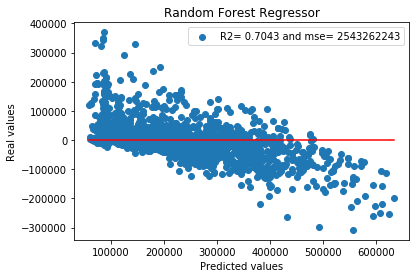

In [44]:
model_test(random_forest_regressor_model, 'Random Forest Regressor')

In [45]:
model_top_deviation(random_forest_regressor_model)

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price,Price_test,SD
9962,158,2,63.131653,8.0,9,8,1939,0.042032,37,6856,...,5,0,1,0,1,0,1,457122,87268,369854
4442,152,3,88.978325,12.0,7,7,1958,0.042032,37,6856,...,5,0,1,0,1,0,1,435206,85499,349707
1606,143,3,78.188446,10.0,17,16,1983,0.049863,18,3746,...,1,0,1,0,1,0,1,427698,84808,342890
696,113,3,94.417145,11.0,6,18,2008,0.050756,24,5469,...,1,0,1,0,1,0,1,404964,71057,333907
132,108,3,110.203972,12.0,19,28,2007,0.019509,37,7687,...,5,0,1,0,1,0,1,477125,146061,331064
3723,33,4,101.554253,9.0,4,5,1958,0.051942,17,4017,...,0,0,1,0,1,0,1,403354,82342,321012
6117,17,3,54.036552,8.0,6,21,2017,0.093443,23,4635,...,4,0,1,0,1,0,1,247820,556053,308233
8181,24,1,66.144440,18.0,1,18,2007,0.111627,50,12238,...,3,0,1,0,1,0,1,194941,491816,296875
3662,54,3,101.279846,20.0,20,37,2014,0.006076,30,5285,...,6,0,1,0,1,0,1,416806,124844,291962
7447,23,3,78.062851,1.0,14,17,2017,0.014334,2,528,...,0,0,1,0,1,0,1,167976,431238,263262


### Gradient Boosting Regressor

In [46]:
gradient_boosting_regressor_model = GradientBoostingRegressor()
gradient_boosting_regressor_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
models_dict['Gradient Boosting Regressor'] = gradient_boosting_regressor_model

#### Test Gradient Boosting Regressor

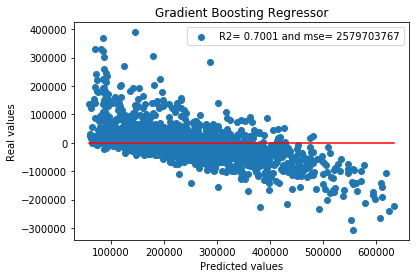

In [48]:
model_test(gradient_boosting_regressor_model, 'Gradient Boosting Regressor')

In [49]:
model_top_deviation(gradient_boosting_regressor_model)

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price,Price_test,SD
132,108,3,110.203972,12.0,19,28,2007,0.019509,37,7687,...,5,0,1,0,1,0,1,535577,146061,389516
4442,152,3,88.978325,12.0,7,7,1958,0.042032,37,6856,...,5,0,1,0,1,0,1,455694,85499,370195
3723,33,4,101.554253,9.0,4,5,1958,0.051942,17,4017,...,0,0,1,0,1,0,1,413502,82342,331160
696,113,3,94.417145,11.0,6,18,2008,0.050756,24,5469,...,1,0,1,0,1,0,1,401587,71057,330530
1606,143,3,78.188446,10.0,17,16,1983,0.049863,18,3746,...,1,0,1,0,1,0,1,407971,84808,323163
6117,17,3,54.036552,8.0,6,21,2017,0.093443,23,4635,...,4,0,1,0,1,0,1,248893,556053,307160
7728,24,3,126.621361,12.0,22,48,2011,0.111627,50,12238,...,3,0,1,0,1,0,1,485266,179396,305870
9962,158,2,63.131653,8.0,9,8,1939,0.042032,37,6856,...,5,0,1,0,1,0,1,389979,87268,302711
6126,202,3,94.137489,9.0,4,7,1983,0.000000,30,7538,...,5,0,1,0,1,0,1,571766,286215,285551
8546,43,2,55.637753,9.0,2,5,1958,0.000078,22,6398,...,23,0,1,0,1,0,1,280189,552515,272326


### LassoCV

In [50]:
lasso_cv_model = LassoCV()

lasso_cv_model.fit(X_train, y_train)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [51]:
models_dict['LassoCV'] = lasso_cv_model

#### Test LassoCV

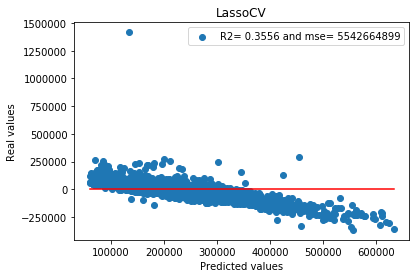

In [52]:
model_test(lasso_cv_model, 'LassoCV')

In [53]:
model_top_deviation(lasso_cv_model)

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price,Price_test,SD
6977,30,2,641.065186,10.0,20,19,2019,0.000078,22,6398,...,23,0,1,0,1,0,1,1550018,133529,1416489
6117,17,3,54.036552,8.0,6,21,2017,0.093443,23,4635,...,4,0,1,0,1,0,1,189695,556053,366358
6794,73,2,73.210350,1.0,16,17,2019,0.042032,37,6856,...,5,0,1,0,1,0,1,271525,633233,361708
8546,43,2,55.637753,9.0,2,5,1958,0.000078,22,6398,...,23,0,1,0,1,0,1,214808,552515,337707
8283,34,1,1.988943,1.0,21,4,1977,0.069753,53,13670,...,11,0,1,0,1,0,1,125908,458378,332470
3305,66,3,78.747856,11.0,2,5,1955,0.161976,31,7010,...,7,0,1,1,0,0,1,281744,606958,325214
8501,95,4,99.039162,11.0,2,3,1942,0.000699,14,3369,...,3,0,1,0,1,0,1,322671,624156,301485
9784,157,3,76.460335,8.0,9,8,1960,0.000000,30,7538,...,5,0,1,0,1,0,1,321890,617749,295859
1982,86,5,275.645294,26.0,12,37,2011,0.161976,31,7010,...,7,0,1,1,0,0,1,742229,455264,286965
465,17,3,85.887405,9.0,8,8,1960,0.000000,25,5027,...,1,0,1,0,1,0,1,264731,547434,282703


### LGBMRegressor

In [54]:
lgbm_regressor_model = LGBMRegressor()
lgbm_regressor_model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [55]:
models_dict['LGBMRegressor'] = lgbm_regressor_model

#### Test LGBMRegressor

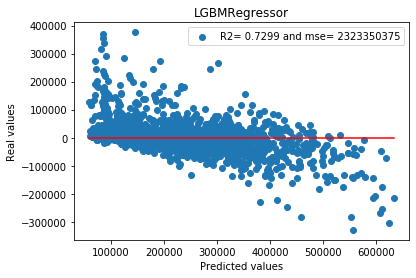

In [56]:
model_test(lgbm_regressor_model, 'LGBMRegressor')

In [57]:
model_top_deviation(lgbm_regressor_model)

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price,Price_test,SD
132,108,3,110.203972,12.0,19,28,2007,0.019509,37,7687,...,5,0,1,0,1,0,1,522140,146061,376079
1606,143,3,78.188446,10.0,17,16,1983,0.049863,18,3746,...,1,0,1,0,1,0,1,453007,84808,368199
4442,152,3,88.978325,12.0,7,7,1958,0.042032,37,6856,...,5,0,1,0,1,0,1,441665,85499,356166
9962,158,2,63.131653,8.0,9,8,1939,0.042032,37,6856,...,5,0,1,0,1,0,1,425398,87268,338130
6117,17,3,54.036552,8.0,6,21,2017,0.093443,23,4635,...,4,0,1,0,1,0,1,226943,556053,329110
3723,33,4,101.554253,9.0,4,5,1958,0.051942,17,4017,...,0,0,1,0,1,0,1,397862,82342,315520
8501,95,4,99.039162,11.0,2,3,1942,0.000699,14,3369,...,3,0,1,0,1,0,1,319827,624156,304329
3000,137,2,64.877319,8.0,8,8,1956,0.200147,23,3975,...,0,0,1,0,1,0,1,383574,90930,292644
3662,54,3,101.279846,20.0,20,37,2014,0.006076,30,5285,...,6,0,1,0,1,0,1,409892,124844,285048
8546,43,2,55.637753,9.0,2,5,1958,0.000078,22,6398,...,23,0,1,0,1,0,1,268980,552515,283535


### XGBRegressor

In [58]:
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)

/usr/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:23:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [59]:
models_dict['XGBRegressor'] = xgboost_model

#### Test XGBRegressor

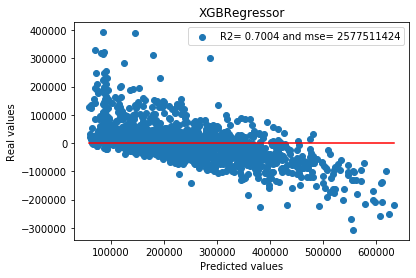

In [60]:
model_test(xgboost_model, 'XGBRegressor')

In [61]:
model_top_deviation(xgboost_model)

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price,Price_test,SD
4442,152,3,88.978325,12.0,7,7,1958,0.042032,37,6856,...,5,0,1,0,1,0,1,477549,85499,392050
132,108,3,110.203972,12.0,19,28,2007,0.019509,37,7687,...,5,0,1,0,1,0,1,535207,146061,389146
696,113,3,94.417145,11.0,6,18,2008,0.050756,24,5469,...,1,0,1,0,1,0,1,401507,71057,330450
9962,158,2,63.131653,8.0,9,8,1939,0.042032,37,6856,...,5,0,1,0,1,0,1,409320,87268,322052
3723,33,4,101.554253,9.0,4,5,1958,0.051942,17,4017,...,0,0,1,0,1,0,1,400423,82342,318081
1606,143,3,78.188446,10.0,17,16,1983,0.049863,18,3746,...,1,0,1,0,1,0,1,400592,84808,315784
7728,24,3,126.621361,12.0,22,48,2011,0.111627,50,12238,...,3,0,1,0,1,0,1,490107,179396,310711
6117,17,3,54.036552,8.0,6,21,2017,0.093443,23,4635,...,4,0,1,0,1,0,1,248761,556053,307292
6126,202,3,94.137489,9.0,4,7,1983,0.000000,30,7538,...,5,0,1,0,1,0,1,585457,286215,299242
3662,54,3,101.279846,20.0,20,37,2014,0.006076,30,5285,...,6,0,1,0,1,0,1,409672,124844,284828


## Result

### Load packages

In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Function

In [63]:
def models_r2(models, test, valid):
    scores = pd.DataFrame(columns=['name', 'r2', 'mse'])
    for name, model in models.items():
        test_pred = model.predict(test)
        r2 = r2_score(valid, test_pred)
        mse = mean_squared_error(valid, test_pred)
        scores = scores.append(
            {'name': name, 'r2': r2, 'mse': mse}, ignore_index=True)
    scores.sort_values('r2', ascending=False, inplace=True)
    return scores

### Choosing the best model

In [64]:
models_score_test = models_r2(models_dict, X_test, y_test)

In [65]:
models_score_train = models_r2(models_dict, X_train, y_train)

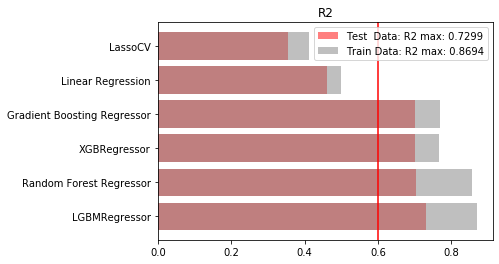

In [73]:
r2_max_test = models_score_test['r2'].max()
r2_max_train = models_score_train['r2'].max()
plt.barh(models_score_test['name'], models_score_test['r2'],
         alpha=0.5, color='red', label=f'Test  Data: R2 max: {r2_max_test:.4f}')
plt.barh(models_score_train['name'], models_score_train['r2'],
         alpha=0.5, color='grey', label=f'Train Data: R2 max: {r2_max_train:.4f}')
plt.title('R2')
plt.legend()
plt.axvline(0.6, color='red')
plt.show()

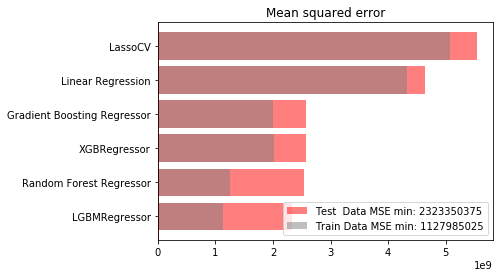

In [74]:
mse_min_test = models_score_test['mse'].min()
mse_min_train = models_score_train['mse'].min()
plt.barh(models_score_test['name'], models_score_test['mse'],
         alpha=0.5, color='red', label=f'Test  Data MSE min: {mse_min_test:.0f}')
plt.barh(models_score_train['name'], models_score_train['mse'],
         alpha=0.5, color='grey', label=f'Train Data MSE min: {mse_min_train:.0f}')
plt.title('Mean squared error')
plt.legend()
plt.axvline(0.6, color='red')
plt.show()

In [68]:
best_model = models_dict[models_score_test.iloc[models_score_test['r2'].idxmax()][0]]

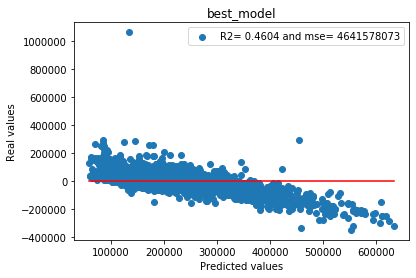

In [69]:
model_test(best_model, 'best_model')

## Output Files

In [70]:
test['Price'] = best_model.predict(test[features])

In [71]:
# test[['Id', 'Price']].to_csv('DRubtsov_predictions.csv',index=None)